<a href="https://colab.research.google.com/github/manasuii/Beginner-ML-Projects/blob/main/FACEMASK_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 70% 115M/163M [00:00<00:00, 1.19GB/s]
100% 163M/163M [00:00<00:00, 1.05GB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2201.jpg', 'with_mask_2189.jpg', 'with_mask_2838.jpg', 'with_mask_3470.jpg', 'with_mask_2913.jpg']
['with_mask_1953.jpg', 'with_mask_3007.jpg', 'with_mask_2117.jpg', 'with_mask_3453.jpg', 'with_mask_2469.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2415.jpg', 'without_mask_223.jpg', 'without_mask_1392.jpg', 'without_mask_2702.jpg', 'without_mask_2971.jpg']
['without_mask_1946.jpg', 'without_mask_2690.jpg', 'without_mask_1804.jpg', 'without_mask_2284.jpg', 'without_mask_39.jpg']


In [13]:
print("number of with mask images:",len(with_mask_files))
print("Number of with no mask images",len(without_mask_files))

number of with mask images: 3725
Number of with no mask images 3828


**Creating label with Two class images**

with mask-->1
without mask-->0


In [14]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [16]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
labels=with_mask_labels+without_mask_labels
print(labels[0:5])
print(labels[-5:])
len(labels)

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


7553

In [ ]:
/content/data/with_mask

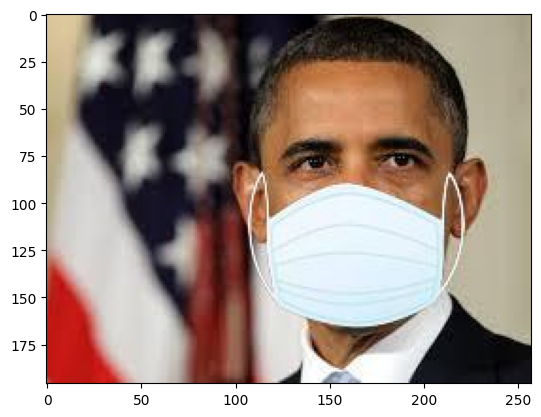

In [21]:
#displaying the images
img=mpimg.imread('/content/data/with_mask/with_mask_1004.jpg')
imgplot=plt.imshow(img)
plt.show()

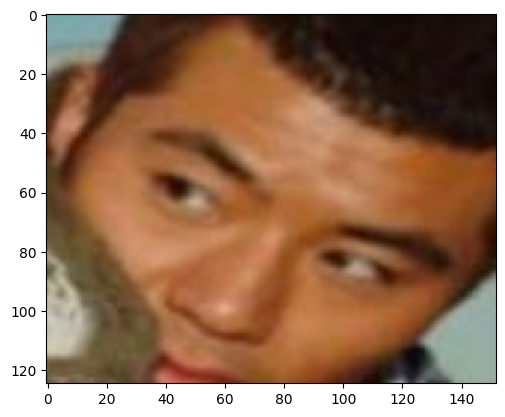

In [22]:
img=mpimg.imread('/content/data/without_mask/without_mask_1001.jpg')
imgplot=plt.imshow(img)
plt.show()

**Image Processing**

1.Resoze the image

2.covert the image to numpy array


In [47]:
#convert the images to numpy array

with_mask_path= '/content/data/with_mask'
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path + '/' + img_file)
  image=image.resize((128,128))
  image=image.convert('RGBA')
  image=np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path +'/'+ img_file)
  image = image.resize((128,128))
  image = image.convert('RGBA')
  image = np.array(image)
  data.append(image)




In [31]:
type(data)

list

In [32]:
len(data)

7553

In [37]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
X=np.array(data)
Y=np.array(labels)

In [40]:
type(X)
type(Y)

numpy.ndarray

In [42]:
print(X)

[[[[236 244 247]
   [236 244 247]
   [236 244 247]
   ...
   [245 246 250]
   [245 246 250]
   [245 246 251]]

  [[235 243 246]
   [235 243 246]
   [235 243 246]
   ...
   [245 246 250]
   [245 246 250]
   [244 245 249]]

  [[233 241 244]
   [233 241 244]
   [233 241 244]
   ...
   [245 246 250]
   [245 246 250]
   [241 243 248]]

  ...

  [[198 204 216]
   [197 200 212]
   [196 195 208]
   ...
   [233 234 241]
   [235 237 244]
   [235 238 248]]

  [[198 204 216]
   [197 200 212]
   [196 195 208]
   ...
   [233 233 241]
   [234 236 243]
   [234 237 247]]

  [[202 202 214]
   [195 195 206]
   [194 192 204]
   ...
   [232 232 238]
   [235 234 241]
   [235 236 245]]]


 [[[228 228 228]
   [228 228 228]
   [228 228 228]
   ...
   [233 233 233]
   [233 233 233]
   [233 233 233]]

  [[228 228 228]
   [228 228 228]
   [228 228 228]
   ...
   [233 233 233]
   [233 233 233]
   [233 233 233]]

  [[228 228 228]
   [228 228 228]
   [228 228 228]
   ...
   [233 233 233]
   [233 233 233]
   [233 233

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [45]:
#scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255


array([[[190,  90,  24],
        [167,  62,  11],
        [134,  44,  11],
        ...,
        [ 48,  31,  19],
        [ 46,  28,  14],
        [ 39,  22,   7]],

       [[191,  89,  21],
        [170,  65,  13],
        [129,  41,   7],
        ...,
        [ 39,  23,  10],
        [ 43,  25,  10],
        [ 47,  29,  14]],

       [[193,  91,  21],
        [169,  67,  13],
        [127,  44,   8],
        ...,
        [ 36,  22,   8],
        [ 37,  19,   5],
        [ 48,  27,  12]],

       ...,

       [[198, 191, 161],
        [195, 189, 158],
        [192, 185, 153],
        ...,
        [233, 205, 164],
        [231, 204, 157],
        [231, 205, 155]],

       [[201, 193, 165],
        [199, 192, 163],
        [197, 190, 160],
        ...,
        [229, 200, 149],
        [227, 198, 145],
        [227, 199, 143]],

       [[202, 196, 167],
        [201, 195, 166],
        [201, 194, 165],
        ...,
        [224, 194, 133],
        [221, 191, 132],
        [220, 191, 134]]], dtype=uint8)
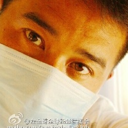

In [48]:
X_train[0]

In [49]:
X_train_scaled[0]

array([[[0.74509804, 0.35294118, 0.09411765],
        [0.65490196, 0.24313725, 0.04313725],
        [0.5254902 , 0.17254902, 0.04313725],
        ...,
        [0.18823529, 0.12156863, 0.0745098 ],
        [0.18039216, 0.10980392, 0.05490196],
        [0.15294118, 0.08627451, 0.02745098]],

       [[0.74901961, 0.34901961, 0.08235294],
        [0.66666667, 0.25490196, 0.05098039],
        [0.50588235, 0.16078431, 0.02745098],
        ...,
        [0.15294118, 0.09019608, 0.03921569],
        [0.16862745, 0.09803922, 0.03921569],
        [0.18431373, 0.11372549, 0.05490196]],

       [[0.75686275, 0.35686275, 0.08235294],
        [0.6627451 , 0.2627451 , 0.05098039],
        [0.49803922, 0.17254902, 0.03137255],
        ...,
        [0.14117647, 0.08627451, 0.03137255],
        [0.14509804, 0.0745098 , 0.01960784],
        [0.18823529, 0.10588235, 0.04705882]],

       ...,

       [[0.77647059, 0.74901961, 0.63137255],
        [0.76470588, 0.74117647, 0.61960784],
        [0.75294118, 0

Building a convoltional neural network(CNN)

In [50]:
import tensorflow as tf
from tensorflow import keras


In [52]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [54]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 784ms/step - acc: 0.6955 - loss: 0.5630 - val_acc: 0.8529 - val_loss: 0.3457
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 125s 736ms/step - acc: 0.8952 - loss: 0.2625 - val_acc: 0.9008 - val_loss: 0.2318
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 126s 743ms/step - acc: 0.9119 - loss: 0.2233 - val_acc: 0.9289 - val_loss: 0.2033
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 125s 734ms/step - acc: 0.9329 - loss: 0.1839 - val_acc: 0.9289 - val_loss: 0.1989
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 724ms/step - acc: 0.9431 - loss: 0.1496 - val_acc: 0.9339 - val_loss: 0.2056


In [55]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - acc: 0.9278 - loss: 0.2187
Test Accuracy = 0.9338186383247375


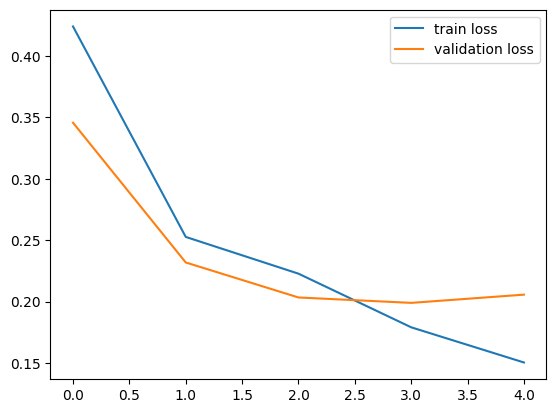

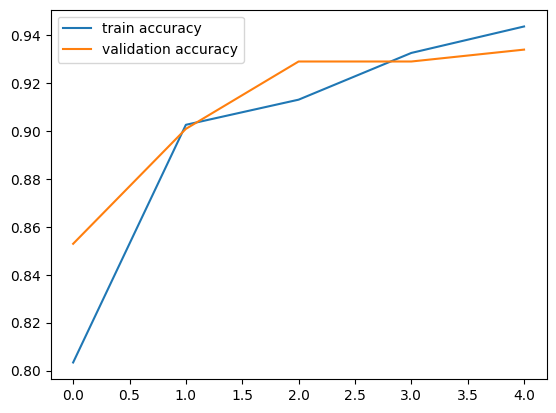

In [56]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/with_mask/with_mask_1001.jpg


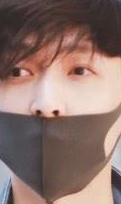

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.49363104 0.5036447 ]]
1
The person in the image is wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


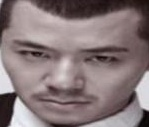

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.53920436 0.4687951 ]]
0
The person in the image is not wearing a mask


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')